In [1]:
pip install ipython-sql

Note: you may need to restart the kernel to use updated packages.


In [2]:
%load_ext sql

In [3]:
import csv, sqlite3

con = sqlite3.connect("socioeconomic.db")
cur = con.cursor()
!pip install -q pandas==1.1.5

  error: subprocess-exited-with-error
  
  Getting requirements to build wheel did not run successfully.
  exit code: 1
  
  [32 lines of output]
  <string>:19: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  <string>:45: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  Traceback (most recent call last):
    File "C:\Users\LENOVO\.spss\folder4anaconda\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 353, in <module>
      main()
    File "C:\Users\LENOVO\.spss\folder4anaconda\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 335, in main
      json_out['return_val'] = hook(**hook_input['kwargs'])
                               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\LENOVO\.spss\folder4anaconda\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 118, in get_requires_for_bui

In [5]:
%sql sqlite:///socioeconomic.db

In [6]:
import pandas
df = pandas.read_csv('https://data.cityofchicago.org/resource/jcxq-k9xf.csv')
df.to_sql("chicago_socioeconomic_data", con, if_exists='replace', index=False,method="multi")


78

In [7]:
%sql SELECT * FROM chicago_socioeconomic_data limit 5;

 * sqlite:///socioeconomic.db
Done.


ca,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index
1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


In [9]:
%sql SELECT COUNT(*) AS Total_row FROM chicago_socioeconomic_data

 * sqlite:///socioeconomic.db
Done.


Total_row
78


In [10]:
%sql SELECT COUNT(*) AS Hig50 FROM chicago_socioeconomic_data WHERE hardship_index > 50.0

 * sqlite:///socioeconomic.db
Done.


Hig50
38


In [11]:
%sql SELECT MAX(hardship_index) AS Max_hi FROM chicago_socioeconomic_data 

 * sqlite:///socioeconomic.db
Done.


Max_hi
98.0


In [12]:
%sql SELECT ca, community_area_name FROM chicago_socioeconomic_data WHERE hardship_index IN (SELECT MAX(hardship_index) FROM chicago_socioeconomic_data);

 * sqlite:///socioeconomic.db
Done.


ca,community_area_name
54.0,Riverdale


In [13]:
%sql SELECT community_area_name FROM chicago_socioeconomic_data WHERE per_capita_income_ > 60000;

 * sqlite:///socioeconomic.db
Done.


community_area_name
Lake View
Lincoln Park
Near North Side
Loop


 * sqlite:///socioeconomic.db
Done.


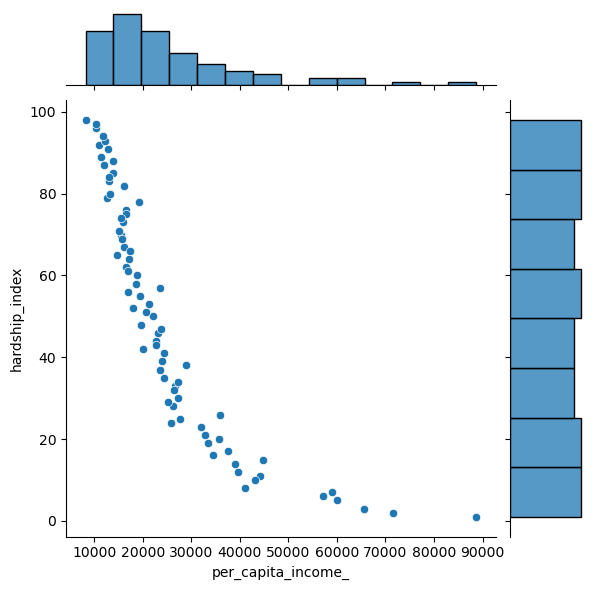

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

income_vs_hardship = %sql SELECT per_capita_income_, hardship_index FROM chicago_socioeconomic_data;
plot = sns.jointplot(x='per_capita_income_',y='hardship_index', data=income_vs_hardship.DataFrame())

 * sqlite:///socioeconomic.db
Done.


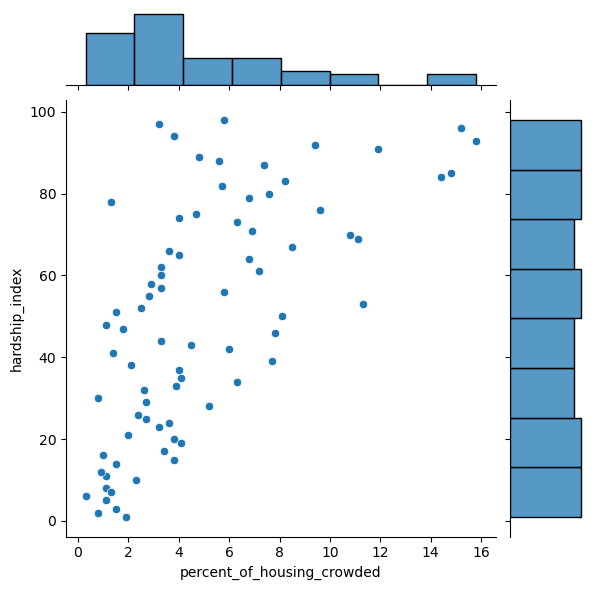

In [17]:
Housing_crowded_vs_hardship = %sql SELECT percent_of_housing_crowded, hardship_index FROM chicago_socioeconomic_data;
plot = sns.jointplot(x='percent_of_housing_crowded',y='hardship_index', data=Housing_crowded_vs_hardship.DataFrame())

 * sqlite:///socioeconomic.db
Done.


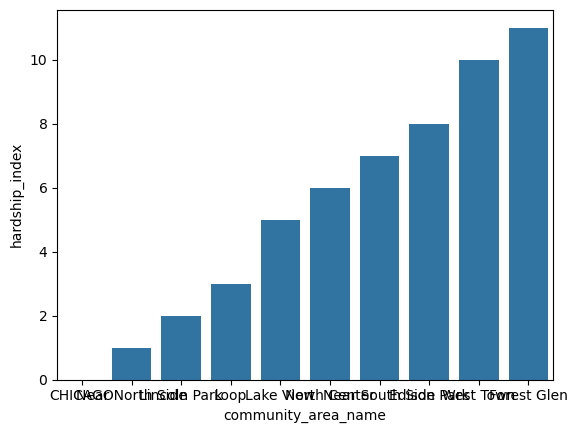

In [21]:
Community_area_vs_Hardship = %sql SELECT community_area_name, hardship_index FROM chicago_socioeconomic_data ORDER BY hardship_index LIMIT 10;
plot = sns.barplot(x='community_area_name',y='hardship_index', data=Community_area_vs_Hardship.DataFrame())

In [ ]:
nemployed = %sql SELECT percent_households_below_poverty, percent_aged_16_unemployed FROM chicago_socioeconomic_data ORDER BY hardship_index LIMIT 10;
plot = sns.lineplot(x='percent_households_below_poverty',y='percent_aged_16_unemployed', data=Community_area_vs_Hardship.DataFrame())